# Time series correlations
### with and without a lag

This is a version of the earlier notebook (timeseries_lag) run on a corpus that is more carefully balanced by author.

It actually only starts by correlating time series. Then it goes on to run some other tests, including comparisons between collections of books divided by author-gender.

On the whole, I think the time-series correlation is not terribly revealing. It's somewhat interesting, perhaps, that the average correlation *across time* is so low (r = .027), when the correlation across the lexicon is so high (r = .68). This suggests to me that the genderedness of words, measured as a ratio, is pretty consistent, but that changes across time are not typically huge, or are in any case often outweighed by random noise.


In [182]:
import os, csv, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
%matplotlib inline


In [180]:
relativepath = os.path.join('..', 'data', 'balanced_bio_logratio.csv')
bio = pd.read_csv(relativepath)

relativepath = os.path.join('..', 'data', 'balanced_fic_logratio.csv')
fic = pd.read_csv(relativepath)

In [107]:
bio.head()

,thedate,had,said,was,wrote,life,made,father,went,took,...,romances,was-initiated,wiped,directing,stepson,fills,off,forbear,barons,was-elated
0,1800.0,-0.226770,0.307967,-0.219808,-2.183410,0.008770,-1.258468,0.142347,-1.063589,-0.842422,...,1.717299,1.717299,1.717299,1.717299,1.717299,1.717299,3.509058,1.717299,-2.502209,1.717299
1,1801.0,-0.868039,0.716117,-0.500141,-0.566037,-0.070802,-0.544721,-1.363895,-2.465785,-0.313785,...,1.225723,-1.076862,1.225723,1.225723,1.225723,1.225723,1.225723,1.225723,1.225723,1.225723
2,1802.0,-1.022767,-0.475585,-0.883109,-2.013018,-1.652735,-1.404428,-0.197448,-0.375791,-1.373756,...,1.513342,1.513342,1.513342,1.513342,1.513342,1.513342,1.513342,0.414730,1.513342,1.513342
3,1803.0,-0.363773,-0.330218,-0.081525,-0.011024,0.033368,0.179846,0.518387,-0.692737,0.297127,...,0.131746,-2.433203,-2.433203,0.131746,0.131746,-1.254548,0.131746,-1.660013,0.131746,3.267241
4,1804.0,-0.339031,-1.830937,-0.393559,-1.314879,-0.411150,-0.605025,0.787556,-0.984723,0.294440,...,0.981806,-0.404488,0.981806,0.981806,0.981806,0.981806,0.981806,-0.116806,-1.790782,0.981806


In [108]:
fic.head()

,thedate,said,had,was,eyes,face,looked,thought,head,hand,...,comb,continuing,unfastened,jammed,initials,riches,extricated,parried,was-waited,paled
0,1800.0,0.120068,-0.004111,0.362407,-0.551393,0.575981,0.678097,-0.532475,-0.961058,-0.307956,...,-0.001601,-0.001601,-0.001601,-0.001601,-0.001601,-3.690481,-0.001601,-0.001601,-0.001601,-0.001601
1,1801.0,0.930792,0.094785,-1.278035,1.140154,0.147011,1.874022,0.227239,-1.813630,1.134773,...,0.790009,0.790009,0.790009,0.790009,0.790009,0.790009,-2.542196,0.790009,0.790009,0.790009
2,1802.0,0.325046,0.417658,0.045558,-0.893955,0.081424,-1.513008,-5.155018,-5.138932,0.420165,...,0.081424,0.081424,0.081424,0.081424,0.081424,0.081424,0.081424,0.081424,0.081424,0.081424
3,1803.0,-0.044556,-0.385996,-0.026705,2.107827,2.075506,0.558291,1.087142,0.302521,0.752491,...,-0.576855,-0.576855,-0.576855,-0.576855,-0.576855,-0.576855,-0.576855,-0.576855,-0.576855,-0.576855
4,1804.0,0.619735,0.269191,-0.385307,-0.472833,0.007774,-0.040659,0.371440,-0.253527,0.547535,...,0.761546,0.510231,0.761546,0.761546,0.761546,0.761546,0.761546,0.761546,0.761546,0.761546


### Getting shared words

This code is basically stolen from Natalie.

In [109]:
bio_list = list(bio.columns.values)
fic_list = list(fic.columns.values)
shared_words = set(fic_list).intersection(set(bio_list))
shared_list = list(shared_words)
shared_list.pop(shared_list.index('thedate'))
fic = fic[(fic.thedate > 1799) & (fic.thedate < 2001)]
bio = bio[(bio.thedate > 1799) & (bio.thedate < 2001)]
fic_subset = fic[list(shared_list)]
bio_subset = bio[list(shared_list)]
print(fic_subset.shape)
print(bio_subset.shape)

(201, 4431)
(201, 4431)


### Example of a word with a significant change across time.

*House* starts out associated with men, and ends up associated with women. This is true in both biography and fiction.

In [116]:
word = 'house'
r, p = pearsonr(fic_subset[word], bio_subset[word])
print(r, p)

0.156370079974 0.0266397388145


word? house


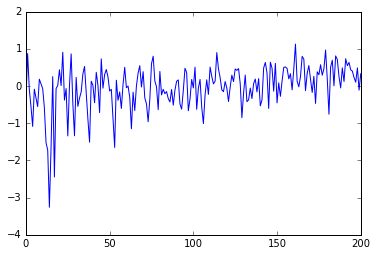

In [117]:
word = input('word? ')
plt.plot(bio_subset[word])

word? house


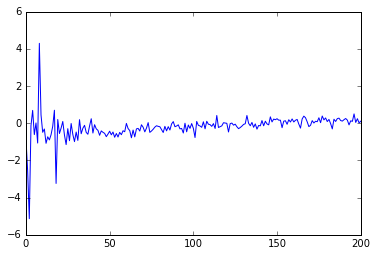

In [118]:
word = input('word? ')
plt.plot(fic_subset[word])

### Fisher's transform: averaging correlation coefficients

Defining a function to average r values.

In [58]:
def fisher_average(listofrvals):
    zscores = (np.arctanh(listofrvals))
    avg_z = sum(zscores) / len(zscores)
    transformed_r = np.tanh(avg_z)
    naive_r = sum(listofrvals) / len(listofrvals)
    
    return transformed_r, naive_r
    

### Measuring correlations without lag

An initial pass on calculating the correlation between two time series for each word:

**a)** genderedness-across-time in fiction and

**b)** genderedness-across-time in biography.

In [119]:
# Let's calculate correlations for each word across time

r_list = []
significant = 0

for w in shared_list:
    r, p = pearsonr(fic_subset[w], bio_subset[w])
    r_list.append(r)
    if (p / 2) < 0.05 and r > 0:
        significant += 1
    # The scipy function reports a two-tailed p-value
    # But we are clearly expecting positive correlations
    # and wouldn't consider negative ones as significant.
    # So I'm dividing p by 2 to convert to a one-tailed test.

print(significant)
print(fisher_average(r_list))
np.median(r_list)

735
(0.026960802923249434, 0.026521664325605841)


0.021956080335559201

The first number above is the number of words with a significant one-tailed (positive) correlation. This is higher than you'd expect randomly. 5% of 4431 = 222. But the average correlation is still low. The numbers in parentheses are mean r values (averaged naively, and with a Fishers transformation). I also print the median. The upshot is that there's clearly a signal here, but it's by no means huge.

My speculation is that correlation is low because noise is relatively high, esp in biographies. Let's test that.

In [129]:
## What happens if we smooth a bit?

r_list = []
significant = 0

def smoothed(sequence):
    smoothversion = []
    for i in range(len(sequence)):
        toaverage = []
        toaverage.append(sequence[i])
        if i > 0:
            toaverage.append(sequence[i-1])
        if i < (len(sequence) - 1):
            toaverage.append(sequence[i + 1])
        smoothversion.append(sum(toaverage) / len(toaverage))
    return smoothversion

for w in shared_list:
    
    r, p = pearsonr(smoothed(fic_subset[w]), smoothed(bio_subset[w]))
    r_list.append(r)
    if (p / 2) < 0.05 and r > 0:
        significant += 1
    # The scipy function reports a two-tailed p-value
    # But we are clearly expecting positive correlations
    # and wouldn't consider negative ones as significant.
    # So I'm dividing p by 2 to convert to a one-tailed test.

print(significant)
print(fisher_average(r_list))
np.median(r_list)

1457
(0.057457920502502716, 0.055153320653067953)


0.04623029360198147

#### effect of smoothing

I'm not sure that smoothing as I did above is methodologically 100% kosher; it was just a quick experiment. For technically rigorous reasoning about time series, we might start e.g. here: https://stats.stackexchange.com/questions/133155/how-to-use-pearson-correlation-correctly-with-time-series However, I think *in practice* the experiment is telling me something useful, which is that yes, correlation is low mostly because there's a lot of noise. It doesn't mean there aren't broad diachronic relationships.

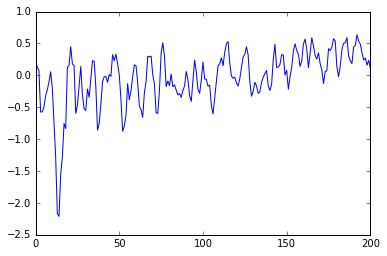

In [136]:
plt.plot(smoothed(bio_subset['house']))

### Correlations with lag

Let's try sliding the time series by as much as 12 years either way. Of course, when we shift the time series relative to each other, the area of overlap in the middle will be *smaller* than the original timeline. In order to make an apples-to-apples comparison between time series of the same length, we'll need to cut something off the end of the time series even when we're just shifting them zero, or one years, relative to each other. In other words, if we want to compare the central overlap between two time series shifted 12 years relative to each other, we need to compare it to an unshifted pairing *that has twelve years taken off either end.*

Trimming the ends is potentially a complicating factor, since the ends of the timeline might be inherently less (or more) likely to correlate. We can partly address this by running the shift comparison several times, with a different "ceiling" on the shift each time. I.e., the first time we'll shift a maximum of two years and That way we can see which differences are due to considering a smaller timeline, and which differences are due to the shift itself.


2
3
4
5
6
7
8
9
10
11
12
13
14


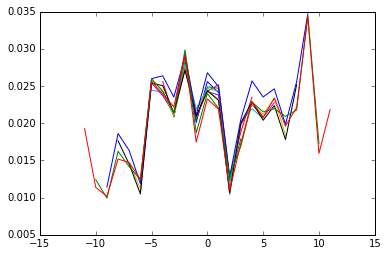

In [60]:
def shifted_correlation(vectora, vectorb, shift_ceiling, shift):
    
    assert len(vectora) == len(vectorb)
    maxlen = len(vectora)
    floor = shift_ceiling
    ceiling = maxlen - shift_ceiling
    floorb = floor + shift
    ceilingb = ceiling + shift
    slicea = vectora[floor : ceiling]
    sliceb = vectorb[floorb : ceilingb]
    return pearsonr(slicea, sliceb)

the_correlations = dict()
# we're going to create a different dictionary entry
# for each "shift-ceiling"

for shift_ceiling in range(2, 15):
    print(shift_ceiling)
    
    shifts = []
    correlations = []
    
    for shift in range(-shift_ceiling, shift_ceiling + 1):
        temp_r = []
        significant = 0

        for w in shared_list:
            r, p = shifted_correlation(fic_subset[w], bio_subset[w], shift_ceiling, shift)
            temp_r.append(r)
            if (p / 2) < 0.05 and r > 0:
                significant += 1

        true_avg, naive_avg = fisher_average(temp_r)
        shifts.append(shift)
        correlations.append(true_avg)
    
    the_correlations[shift_ceiling] = list(zip(shifts, correlations))
    
    # we save a list of tuples where x[0] = shift and x[1] = avg corr

for sc in range(2,15):
    x, y = zip(*the_correlations[sc])
    plt.plot(x, y)

plt.show()

#### Interpretation.

The pattern is not very regular, and looked at in isolation I'm not sure that it's meaningful. As you'll see below, there's some reason to think that this is dominated by wild fluctuations on the early end of the timeline, caused by low sample size.

Let's check that by considering later slices of the timeline that won't include the early wild fluctuations. We'll select a slice of 100 years and then slide biographies up to 15 yrs forward and back.




15
30
60
75
85


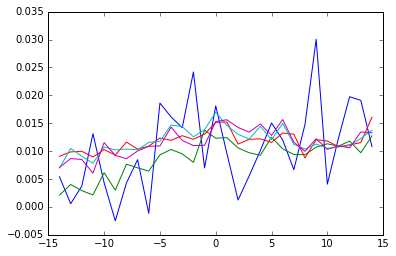

In [112]:
import math

def correlate_arbitrary_slice(vectora, vectorb, shift, absolute_floor):
    
    assert len(vectora) == len(vectorb)
    maxlen = len(vectora)
    floor = absolute_floor
    ceiling = absolute_floor + 100
    floorb = floor + shift
    ceilingb = ceiling + shift
    slicea = vectora[floor : ceiling]
    sliceb = vectorb[floorb : ceilingb]
    
    return pearsonr(slicea, sliceb)

the_correlations = dict()
# we're going to create a different dictionary entry
# for each "shift-ceiling"

for absolute_floor in [15, 30, 60, 75, 85]:
    print(absolute_floor)
    shift_ceiling = 14
    shifts = []
    correlations = []
    
    for shift in range(-shift_ceiling, shift_ceiling + 1):
        temp_r = []
        significant = 0

        for w in shared_list:
            r, p = correlate_arbitrary_slice(fic_subset[w], bio_subset[w], shift, absolute_floor)
            if not math.isnan(r):
                temp_r.append(r)
            if (p / 2) < 0.05 and r > 0:
                significant += 1

        true_avg, naive_avg = fisher_average(temp_r)
        shifts.append(shift)
        correlations.append(true_avg)
    
    the_correlations[absolute_floor] = list(zip(shifts, correlations))
    
    # we save a list of tuples where x[0] = shift and x[1] = avg corr

for af in [15, 30, 60, 75, 85]:
    x, y = zip(*the_correlations[af])
    plt.plot(x, y)

plt.show()

### Aha. Yep, wild fluctuations only on the early end.

The blue line above is the first slice, which includes wild early fluctuations in biography. But if you ignore it and look at the other lines, there's a more stable pattern, and once that seems to peak around zero (if it peaks at all). In other words, I don't think there's a lot of evidence that the correlation between biography and fiction is strengthened by time-shifting them relative to each other.

I'm happy with that, because the time-shifting was going to be weak evidence of causal relationship anyway. It's kind of better to say "we have no evidence of causality one way or the other."

You can also see below that the mean correlation is semi-stable over time, and definitely no longer weakening over time. A lot of weird patterns that seemed meaningful in the first version of this notebook have vanished now that I've done a more careful job of balancing author genders across the whole timeline.


In [125]:
for af in [15, 30, 60, 75, 85]:
    x, y = zip(*the_correlations[af])
    meancorr = sum(y) / len(y)
    print("From " + str(1800 + af) + " to " + str(1800 + af + 100) + " mean: " + str(meancorr) + " and sd: " 
          + str(np.std(y)))

From 1815 to 1915 mean: 0.0105352023173 and sd: 0.00762086059829
From 1830 to 1930 mean: 0.00880402934585 and sd: 0.003279056581
From 1860 to 1960 mean: 0.0116674291246 and sd: 0.00178960179517
From 1875 to 1975 mean: 0.011859119262 and sd: 0.00219514166026
From 1885 to 1985 mean: 0.0115157148385 and sd: 0.00246470186403


### Calculating means

Okay. Let's forget about time series. Significance there is somewhat elusive. Instead let's focus on the mean log-ratios for various genres, author genders, and slices of time.

Let's start by comparing the whole bio dataset to the whole fiction dataset.

Some code below is stolen from Natalie Declerck.


In [137]:
bio_mean = bio_subset.mean(axis=0).reset_index()
bio_mean.columns = ['word', 'bio_mean']
fic_mean = fic_subset.mean(axis=0).reset_index()
fic_mean.columns = ['word', 'fic_mean']
means_df = pd.DataFrame(bio_mean).merge(pd.DataFrame(fic_mean), on='word', how='inner')
means_df.sort_values(by='fic_mean', ascending=False).head(10)

,word,bio_mean,fic_mean
1567,husband,4.376065,3.590426
2139,ladyship,3.171119,3.389437
3260,maid,3.015947,3.066018
2625,woman,3.629041,2.759678
3218,there,2.607489,2.685848
1119,about,2.486044,2.628244
3537,now,2.398059,2.595798
1772,so,1.938943,2.573059
3915,up,2.572108,2.571694
1155,away,2.327617,2.522103


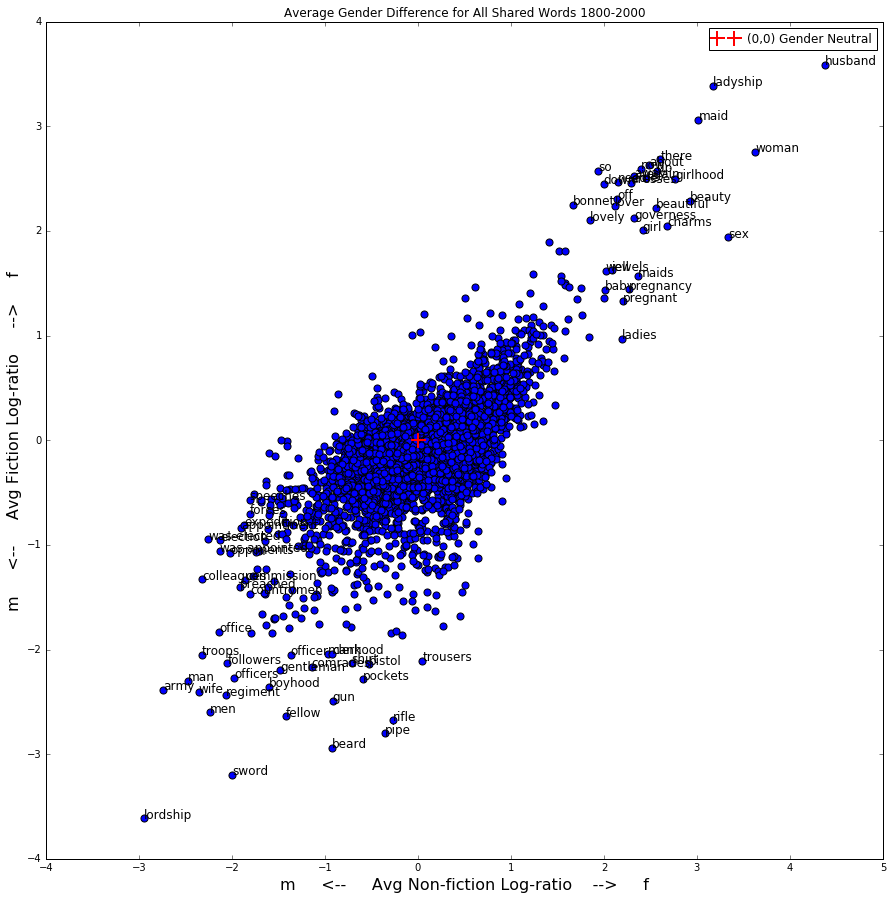

In [151]:
all_words = list(means_df.word.unique())
len(all_words)

def plot_diff_means(words, frametoplot, adjust=False, title=False, label_outliers=False, normalize_axes=False, save=False):
    df = frametoplot.loc[(frametoplot.word.isin(words)),:]
    ax0 = df.plot('bio_mean', 'fic_mean', kind='scatter', s=50, figsize=(15,15))
    ax0.plot(0, 0, 'r+', ms=15, mew=2, label='(0,0) Gender Neutral')
    
    texts = []
    for x, y, s in zip(df['bio_mean'], df['fic_mean'], df['word']):
        if label_outliers:
            if ((-1.8 < x < 2) == False) | ((-2 < y < 2) == False):
                texts.append((x, y, s))
    
    plt.legend(loc='best')
    plt.xlabel('m     <--     Avg Non-fiction Log-ratio    -->     f', fontsize=16, )
    plt.ylabel('m     <--     Avg Fiction Log-ratio     -->     f', fontsize=16)
    if title:
        plt.title(title)
    if normalize_axes:
        ylim = ax0.get_ylim()
        xlim = ax0.get_xlim()
        new_low = min(xlim[0], ylim[0])
        new_hi = max(xlim[1], ylim[1])
        plt.ylim(new_low, new_hi)
        plt.xlim(new_low, new_hi)
    
    if label_outliers:
        for x, y, label in texts:
            plt.annotate(label, xy=(x, y), size = 12)
    
    if save:
        if title:
            plt.savefig('./{}.png'.format(title))
        else:
            plt.savefig('./genderDiffMeans.png')
    plt.show()
    
plot_diff_means(all_words, means_df, adjust=True, title="Average Gender Difference for All Shared Words 1800-2000", label_outliers=True, normalize_axes=False, save = False)

In [72]:
pearsonr(means_df['bio_mean'], means_df['fic_mean'])

(0.67898680833008551, 0.0)

#### Interpretation.

So, the correlation is rather strong overall. Mean logratios for fiction and nonfiction correlate at r = .67. But the correlation is stronger for women than for men, which is why the scatterplot has this teardrop shape. For men, there's a difference between words highly gendered in fiction (*rifle, pipe, beard, trousers*), and words highly gendered in nonfiction (*colleagues, office, speeches, troops*). Basically, it's a difference between the personal and the political, or between adventure and work. That difference seems flattened out for women.

We can test that by dividing the graph above along a transverse diagonal line, from upper left slanting down to lower right, and calculating the correlation coefficient for each half.

In [146]:
ismasculine = means_df.bio_mean + means_df.fic_mean < 0
print('words in the southwest half of the graph: ')
print(pearsonr(means_df.loc[ismasculine, 'bio_mean'], means_df.loc[ismasculine, 'fic_mean']))
print()

isfeminine = means_df.bio_mean + means_df.fic_mean > 0
print('words in the northeast half of the graph:')
print(pearsonr(means_df.loc[isfeminine, 'bio_mean'], means_df.loc[isfeminine, 'fic_mean']))

words in the southwest half of the graph: 
(0.32075514089599061, 6.8940413274045671e-59)

words in the northeast half of the graph:
(0.66832314329048781, 3.1067357605115541e-261)


That's a pretty substantial difference. Correlation is tighter, more linear, in the northeast (feminine) part of the pattern.

Since this seems to reflect a wider range of social roles for men than for women, we might want to know whether it's a pattern that changes over time

In [148]:
df_dict = dict()

for i in range (0, 200, 50):
    print('Years from ' + str(1800 + i) + " to " + str(1850+i) + ": ")
    bio_mean = bio_subset[i : i + 51].mean(axis=0).reset_index()
    bio_mean.columns = ['word', 'bio_mean']
    fic_mean = fic_subset[i : i + 51].mean(axis=0).reset_index()
    fic_mean.columns = ['word', 'fic_mean']
    test_df = pd.DataFrame(bio_mean).merge(pd.DataFrame(fic_mean), on='word', how='inner')
    
    ismasculine = test_df.bio_mean + test_df.fic_mean < 0
    print('bio/fic correlation for masculine words: ')
    print(pearsonr(test_df.loc[ismasculine, 'bio_mean'], test_df.loc[ismasculine, 'fic_mean']))

    isfeminine = test_df.bio_mean + test_df.fic_mean > 0
    print('and feminine words:')
    print(pearsonr(test_df.loc[isfeminine, 'bio_mean'], test_df.loc[isfeminine, 'fic_mean']))
    print()
    
    df_dict[1800 + i] = test_df

Years from 1800 to 1850: 
bio/fic correlation for masculine words: 
(0.080269156897242983, 0.00011555130512772658)
and feminine words:
(0.23771240336881105, 9.8425811866446894e-29)

Years from 1850 to 1900: 
bio/fic correlation for masculine words: 
(0.31232994476336423, 1.4159707466974178e-59)
and feminine words:
(0.55002719742021833, 1.5146387808418233e-146)

Years from 1900 to 1950: 
bio/fic correlation for masculine words: 
(0.34287869515540598, 1.1650156463484877e-66)
and feminine words:
(0.66213904911954147, 6.5476135066185007e-259)

Years from 1950 to 2000: 
bio/fic correlation for masculine words: 
(0.47008349102400315, 4.315613762541095e-128)
and feminine words:
(0.70908230746457257, 9.7824997876566816e-322)



#### Interpretation.

Hmm. That's interesting in more ways than I expected! The gap between men and women may get smaller, but the other thing that's happening is even more dramatic!

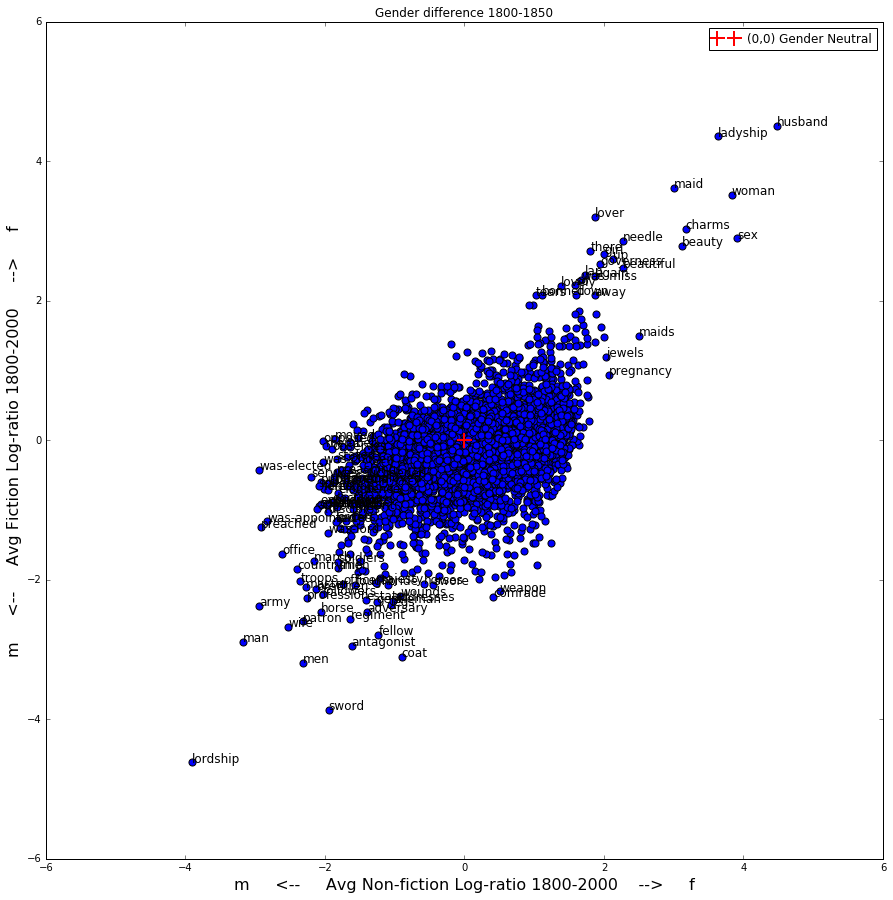

In [150]:
plot_diff_means(all_words, df_dict[1800], adjust=True, title="Gender difference 1800-1850", label_outliers=True, normalize_axes=False, save = False)

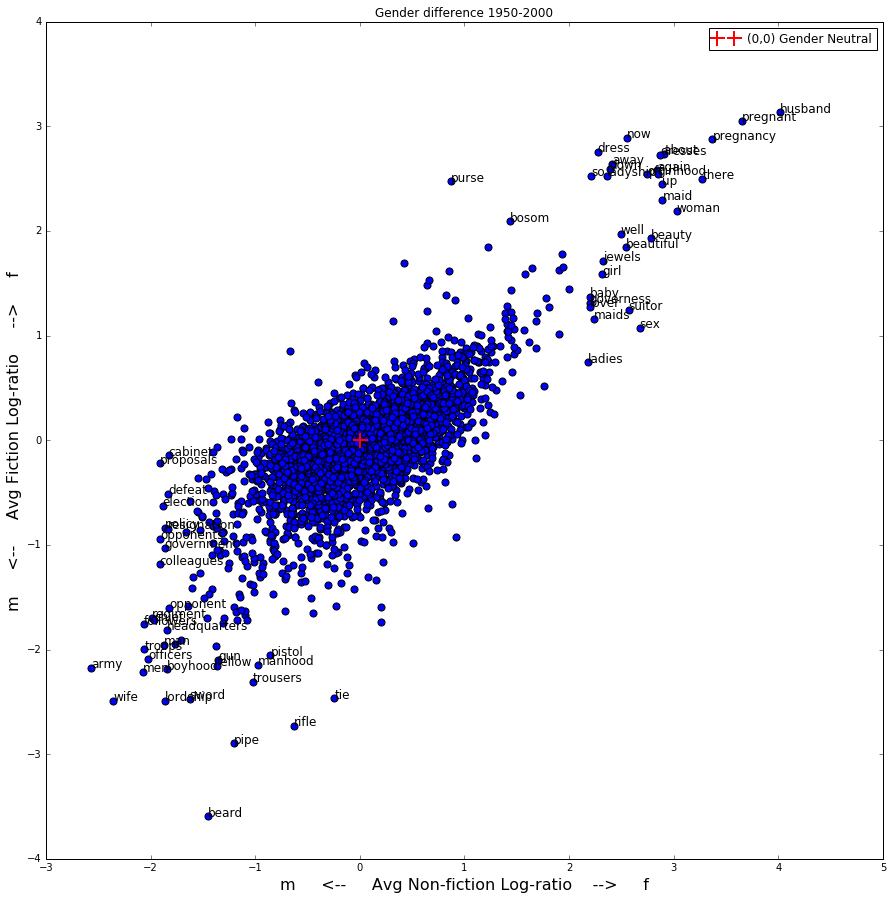

In [152]:
plot_diff_means(all_words, df_dict[1950], adjust=True, title="Gender difference 1950-2000", label_outliers=True, normalize_axes=False, save = False)

I am really not sure how to explain that! Okay, with the first part of the timeline it could be explained by low sample size. Maybe correlation is lower because we have more noise. But sample size doesn't keep getting bigger for the whole 200-year period. It's pretty flat in the 20c.

Also, biographies and fiction are supposed to be getting *less* similar, not *more* similar!

In any case, there is not a lot of evidence for the hypothesis I set out to test: the notion that the diversity of roles for women would catch up to men.

### Comparing fiction by men to fiction by women

We've been comparing genres. What if we compared the gender perspectives *expressed* by women to those expressed by men?

In [155]:
relativepath = os.path.join('..', 'data', 'authspecific_fic_logratio.f.csv')
ffic = pd.read_csv(relativepath)

relativepath = os.path.join('..', 'data', 'authspecific_fic_logratio.m.csv')
mfic = pd.read_csv(relativepath)

fem_list = list(ffic.columns.values)
masc_list = list(mfic.columns.values)
shared_words = set(fem_list).intersection(set(masc_list))
shared_list = list(shared_words)
shared_list.pop(shared_list.index('thedate'))
ffic = ffic[(ffic.thedate > 1799) & (ffic.thedate < 2001)]
mfic = mfic[(mfic.thedate > 1799) & (mfic.thedate < 2001)]
ffic = ffic[list(shared_list)]
mfic = mfic[list(shared_list)]
print(ffic.shape)
print(mfic.shape)

(201, 6000)
(201, 6000)


In [156]:
fem_mean = ffic.mean(axis=0).reset_index()
fem_mean.columns = ['word', 'fem_mean']
masc_mean = mfic.mean(axis=0).reset_index()
masc_mean.columns = ['word', 'masc_mean']
gender_df = pd.DataFrame(fem_mean).merge(pd.DataFrame(masc_mean), on='word', how='inner')
gender_df.head()

,word,fem_mean,masc_mean
0,telegraphed,-0.181246,0.372623
1,quoted,-0.261620,-0.049761
2,fly,-0.042589,-0.142159
3,shoulder,-0.382088,-0.580295
4,threat,-0.302538,-0.163507


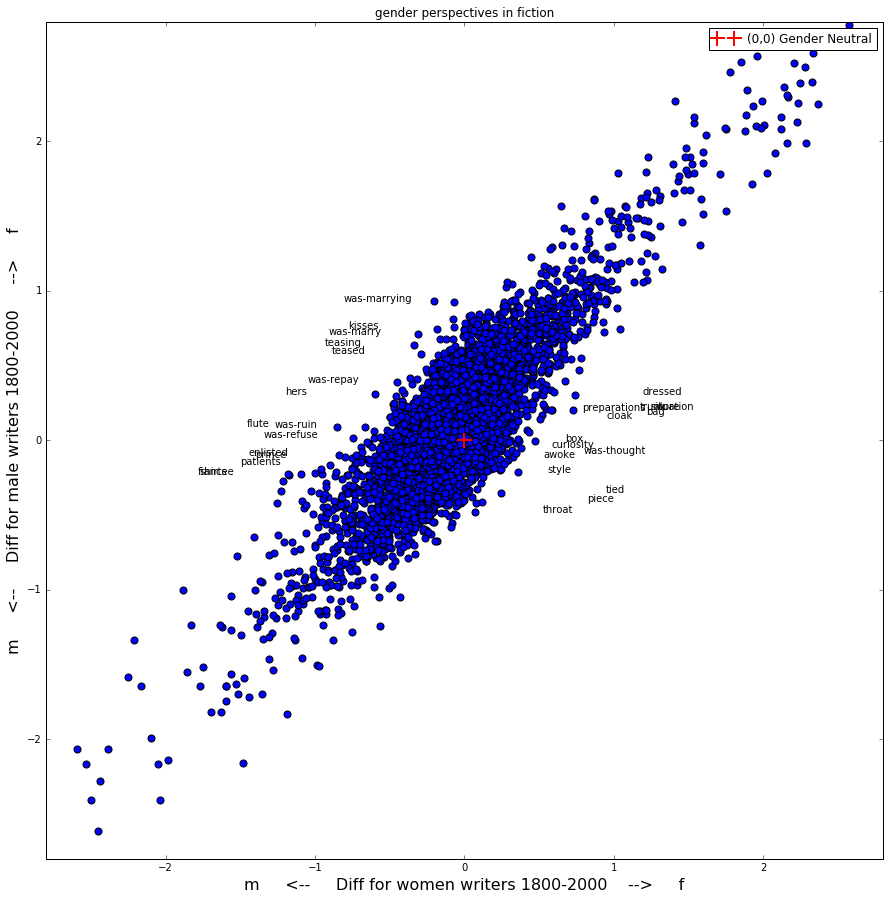

['flute', 'hers', 'was-marry', 'teasing', 'was-refuse', 'enlisted', 'was-ruin', 'was-repay', 'was-marrying', 'prince', 'kisses', 'teased', 'patients', 'fiancee', 'shirts', 'situation', 'bag', 'cloak', 'awoke', 'piece', 'throat', 'was-thought', 'curiosity', 'wore', 'preparations', 'box', 'tied', 'style', 'dressed', 'trunk']


In [215]:
all_words = list(gender_df.word.unique())
len(all_words)

def plot_gender_means(words, frametoplot, adjust=False, title=False, label_outliers=False, normalize_axes=False, save=False):
    df = frametoplot.loc[(frametoplot.word.isin(words)),:]
    ax0 = df.plot('fem_mean', 'masc_mean', kind='scatter', s=50, figsize=(15,15))
    ax0.plot(0, 0, 'r+', ms=15, mew=2, label='(0,0) Gender Neutral')
    
    linearmodel = sm.OLS(gender_df['fem_mean'], gender_df['masc_mean'])
    results = linearmodel.fit()
    residuals = results.resid
    residratios = []
    for x, y, r in zip(df['fem_mean'], df['masc_mean'], residuals):
        distance = math.sqrt(x**2 + y **2)
        if distance < 0.8:
            distance = 0.8
        ratio = r / distance
        residratios.append(ratio)
    residualtuples = list(zip(residratios, df['word']))
    residualtuples.sort()
    outliers = [x[1] for x in residualtuples[0: 15]]
    outliers.extend([x[1] for x in residualtuples[-15 :]])
    
    texts = []
    alternate = 0.2
    taken = []
    for x, y, s, r in zip(df['fem_mean'], df['masc_mean'], df['word'], residuals):
        if label_outliers:
            if s in outliers:
                # The code that follows is my really sloppy and lazy
                # attempt to keep labels from overlapping.
                
                if r > 0:
                    texts.append((x + alternate, y, s))
                    alternate += 0.25
                    if alternate > 0.9:
                        alternate = 0.2
                else:
                    texts.append((x-0.6, y, s))
    
    plt.legend(loc='best')
    plt.xlabel('m     <--     Diff for women writers 1800-2000    -->     f', fontsize=16, )
    plt.ylabel('m     <--     Diff for male writers 1800-2000     -->     f', fontsize=16)
    if title:
        plt.title(title)
    if normalize_axes:
        ylim = ax0.get_ylim()
        xlim = ax0.get_xlim()
        new_low = min(xlim[0], ylim[0])
        new_hi = max(xlim[1], ylim[1])
        plt.ylim(new_low, new_hi)
        plt.xlim(new_low, new_hi)
    else:
        plt.ylim(-2.8, 2.8)
        plt.xlim(-2.8, 2.8)
    
    if label_outliers:
        for x, y, label in texts:
            plt.annotate(label, xy=(x, y), size = 10)
    
    if save:
        if title:
            plt.savefig('./{}.png'.format(title))
        else:
            plt.savefig('./genderDiffMeans.png')
    plt.show()
    print(outliers)

plot_gender_means(all_words, gender_df, adjust=False, title="gender perspectives in fiction", label_outliers=True, normalize_axes=False, save = False)

It's a pretty strong correlation. By and large, men and women agree about gender. The words at the ends of this pattern are familiar and won't surprise you: you've seen them above. 

The outliers on the edges of the pattern are more interesting. The ones to the northwest are words that male writers consider feminine (or neutral), but women consider masculine. The ones to the southeast are ones that male writers consider masculine (or neutral), but women consider feminine.

There are some odd details. But a loose pattern emerges: both genders associate practical details like clothes and bags with themselves, but teasing and marrying with the opposite sex.

In [84]:
pearsonr(gender_df['fem_mean'], gender_df['masc_mean'])

(0.86606605215143517, 0.0)

#### Interpretation

It appears that there's actually a lot of agreement.


But are the two ends faintly different? A faint shadow of the "teardrop" pattern we saw above?

In [217]:
ismasculine = gender_df.fem_mean + gender_df.masc_mean < 0
print('bio/fic correlation for masculine words: ')
print(pearsonr(gender_df.loc[ismasculine, 'fem_mean'], gender_df.loc[ismasculine, 'masc_mean']))

isfeminine = gender_df.fem_mean + gender_df.masc_mean > 0
print('and feminine words:')
print(pearsonr(gender_df.loc[isfeminine, 'fem_mean'], gender_df.loc[isfeminine, 'masc_mean']))
print()

bio/fic correlation for masculine words: 
(0.73821089150927588, 0.0)
and feminine words:
(0.80579315720842359, 0.0)



### Comparing biographies by men to those by women

In [97]:
relativepath = os.path.join('..', 'data', 'authspecific_bio_logratio.f.csv')
fbio = pd.read_csv(relativepath)

relativepath = os.path.join('..', 'data', 'authspecific_bio_logratio.m.csv')
mbio = pd.read_csv(relativepath)

fem_list = list(fbio.columns.values)
masc_list = list(mbio.columns.values)
shared_words = set(fem_list).intersection(set(masc_list))
shared_list = list(shared_words)
shared_list.pop(shared_list.index('thedate'))
fbio = fbio[(fbio.thedate > 1799) & (fbio.thedate < 2001)]
mbio = mbio[(mbio.thedate > 1799) & (mbio.thedate < 2001)]
fbio = fbio[list(shared_list)]
mbio = mbio[list(shared_list)]
print(fbio.shape)
print(mbio.shape)

(201, 6000)
(201, 6000)


In [98]:
fbio.head()

,adopts,telegraphed,singled,quoted,fly,was-dissatisfied,shoulder,threat,majority,critic,...,plantation,rage,destroy,inclination,duke,treasurer,told,more,execution,personality
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.714267,0.714267,0.714267,0.714267,0.714267,0.714267,0.714267,0.714267,0.714267,0.714267,...,0.714267,0.714267,0.714267,0.714267,0.714267,0.714267,-3.763070,-4.473119,0.714267,0.714267
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.725457,-0.725457,-0.725457,1.353985,-0.725457,-0.725457,-0.725457,-0.725457,-0.725457,-0.725457,...,-0.725457,-3.290406,1.066302,0.304162,-0.725457,1.353985,0.559741,0.101222,-0.354597,-0.725457
4,0.500973,0.500973,0.500973,0.500973,3.868269,0.500973,0.500973,0.500973,0.500973,0.500973,...,0.500973,-0.341919,0.500973,-4.190375,0.500973,0.500973,0.140532,0.500973,0.500973,0.500973


In [99]:
fem_mean = fbio.mean(axis=0).reset_index()
fem_mean.columns = ['word', 'fem_mean']
masc_mean = mbio.mean(axis=0).reset_index()
masc_mean.columns = ['word', 'masc_mean']
gender_df = pd.DataFrame(fem_mean).merge(pd.DataFrame(masc_mean), on='word', how='inner')
gender_df.head()

,word,fem_mean,masc_mean
0,adopts,0.414351,1.158890
1,telegraphed,-0.072665,0.472291
2,singled,0.431462,1.168191
3,quoted,-0.266596,-0.227789
4,fly,0.434743,0.859786


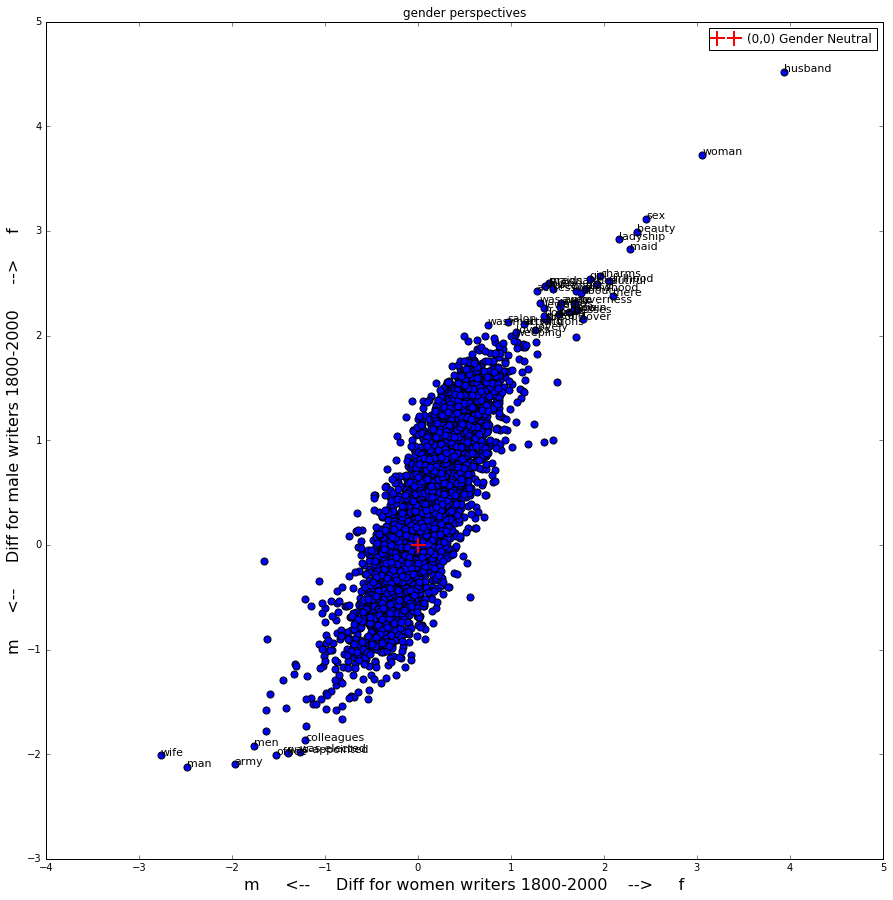

In [102]:
all_words = list(gender_df.word.unique())
len(all_words)

def plot_gender_means(words, frametoplot, adjust=False, title=False, label_outliers=False, normalize_axes=False, save=False):
    df = frametoplot.loc[(frametoplot.word.isin(words)),:]
    ax0 = df.plot('fem_mean', 'masc_mean', kind='scatter', s=50, figsize=(15,15))
    ax0.plot(0, 0, 'r+', ms=15, mew=2, label='(0,0) Gender Neutral')
    
    texts = []
    for x, y, s in zip(df['fem_mean'], df['masc_mean'], df['word']):
        if label_outliers:
            if ((-1.8 < x < 2) == False) | ((-1.8 < y < 2) == False):
                texts.append((x, y, s))
    
    plt.legend(loc='best')
    plt.xlabel('m     <--     Diff for women writers 1800-2000    -->     f', fontsize=16, )
    plt.ylabel('m     <--     Diff for male writers 1800-2000     -->     f', fontsize=16)
    if title:
        plt.title(title)
    if normalize_axes:
        ylim = ax0.get_ylim()
        xlim = ax0.get_xlim()
        new_low = min(xlim[0], ylim[0])
        new_hi = max(xlim[1], ylim[1])
        plt.ylim(new_low, new_hi)
        plt.xlim(new_low, new_hi)
    
    if label_outliers:
        for x, y, label in texts:
            plt.annotate(label, xy=(x, y), size = 11)
    
    if save:
        if title:
            plt.savefig('./{}.png'.format(title))
        else:
            plt.savefig('./genderDiffMeans.png')
    plt.show()

plot_gender_means(all_words, gender_df, adjust=True, title="gender perspectives", label_outliers=True, normalize_axes=False, save = False)